# Сегодня я буду парсить самый популярный сайт https://www.babyblog.ru/

Уже давно пора догонять слабений YouScan и сделать его по качеству (всего).

Приступим!

1. Запрос к сайту (поиску там формируется следующим образом): https://www.babyblog.ru/ + /search/all?query=дюфастон #или любое другое слово, которое мы ищем

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import html2text
import random
import ware_house
import re
desktop_agents = ware_house.desktop_agents

In [4]:
def replace_other(text):
        """This function replace all not necessary symbols in the text"""
        for i in ware_house.replace_list:
            text = text.replace(i, "")

        return (text)


def random_headers():
    """This function create a random header for my parser"""
    return {'User-Agent': random.choice(desktop_agents),
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}


def handle_text(text):
    """This function handle text and make it in the good format"""
    h = html2text.HTML2Text()
    h.ignore_links = True
    h.escape_all = True
    text = h.handle(text)
    text = replace_other(text)
    return (text)


def request_action(url, timeout):
    r = requests.get(url, headers=random_headers(), timeout=timeout)
    soup = BeautifulSoup(r.text, 'html.parser')
    return (soup)

In [5]:
main_web_page =  "https://www.babyblog.ru"
medicene = "Дюфастон"
page_number = 7
web_page = main_web_page + "/search/all/"+ str(page_number) + "?query=" + medicene + "&sort=date"
print (web_page)
#https://www.babyblog.ru/search/all/3?query=Дюфастон&sort=date
#https://www.babyblog.ru/search/all/3?query=%D0%94%D1%8E%D1%84%D0%B0%D1%81%D1%82%D0%BE%D0%BD&sort=date

https://www.babyblog.ru/search/all/7?query=Дюфастон&sort=date


In [4]:
url = web_page  # + str(j)
soup = request_action(url, 20)
print (soup.prettify())

<!DOCTYPE HTML>
<html lang="ru-ru">
 <head>
  <title>
   Поиск по сайту. Стр. 7
  </title>
  <meta content="Поиск по сайту. Бэбиблог — все о беременности и материнстве. Стр. 7" name="description"/>
  <meta content="" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <meta charset="utf-8">
    <meta content="ru" http-equiv="content-language"/>
    <meta content="yes" name="apple-mobile-web-app-capable"/>
    <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
    <meta content="width=1200, user-scalable=yes" name="viewport"/>
    <meta content="on" http-equiv="cleartype"/>
    <meta content="telephone=no" name="format-detection"/>
    <meta content="address=no" name="format-detection"/>
    <meta content="17d189a62d923e3b" name="mailru-verification">
     <meta content="//st.babyblog.ru/st26903/v4_bem" name="static-path"/>
     <meta content="//st.babyblog.ru/st26903" name="origin-static-path"/>
     <meta content="26903" name="sty

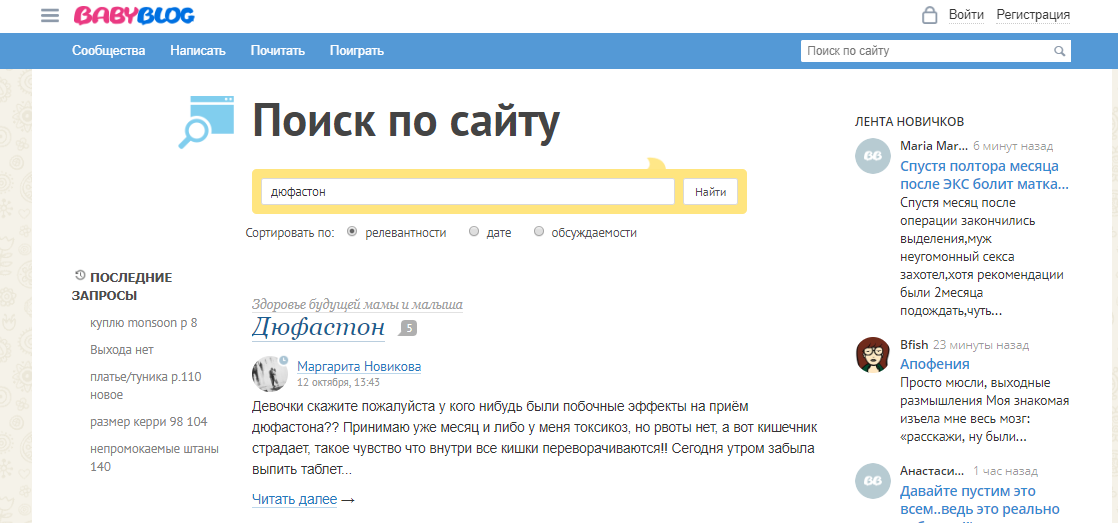

In [5]:
spans = soup.find_all('a', attrs={'class': "js__objectTitle"}) 
#на этом этапе нахожу все ссылки на странице, которые относятся к релевантой теме 
#собираем со страницы все ссылки на community, где препарат обсуждается
communities = []
#заметим, что всякого рода обмены нас мало интересуют + ссылки содержат подсказки, поэтому отфильтруем только необходимые
for span in spans:
#     if span.attrs['href'].find ("obmen") == -1:
        communities.append (span.attrs['href'])
# print (communities)

spans = soup.find_all('a', attrs={'class': "js__objectTitle"}) 

titles = []

for span in spans:
#     print (span)
    text = str(span)[str(span).find("""title=""")+9:str(span).find("""</a>""")]
    titles.append (text)


spans = soup.find_all('span', attrs={'class': "blog-created rel fl"}) 

time_list = []

for span in spans:
    print (span)
    text = str(span)[str(span).find("""fl""")+4:str(span).find("""</span>""")]
    time_list.append (text)

print (len(communities))
print (len(titles))    
print (len(time_list))
print (len(web_sites_post))
# print ((time_list))
    

<span class="blog-created rel fl">22 ноября, 09:30</span>
<span class="blog-created rel fl">22 ноября, 08:49</span>
<span class="blog-created rel fl">22 ноября, 07:37</span>
<span class="blog-created rel fl">22 ноября, 00:22</span>
<span class="blog-created rel fl">21 ноября, 21:39</span>
<span class="blog-created rel fl">21 ноября, 21:15</span>
<span class="blog-created rel fl">21 ноября, 20:13</span>
<span class="blog-created rel fl">21 ноября, 17:29</span>
<span class="blog-created rel fl">21 ноября, 17:12</span>
<span class="blog-created rel fl">21 ноября, 16:29</span>
9
9
10


NameError: name 'web_sites_post' is not defined

In [6]:
name_category = []
titles_of_posts = []
web_sites_post = []
time_posts = []
spans = soup.find_all('div', attrs={'class': "js__postLenta blog-entry clearfix"})  #, attrs={'class': "js__objectTitle"}) 

print (len(spans))
for span in spans:
    if not not list(list(span.children)[1].find_all('a')):
        if not list(span.children)[1].find_all('a', attrs={'class': "_lgr _lh16"}):
            name_category.append('Users')

        else:
            name_category.append(list(span.children)[1].find_all('a', attrs={'class': "_lgr _lh16"})[0].get_text())
        titles_of_posts.append(list(span.children)[1].find_all('a', attrs={'class': "js__objectTitle"})[0].get_text())
        web_sites_post.append((list(span.children)[1].find_all('a', attrs={'class': "js__objectTitle"})[0].attrs['href']))

spans = soup.find_all('span', attrs={'class': "blog-created rel fl"}) #clear post-data hide rel oh _nw
print (spans)
for span in spans:
#     print((list(span.children))[0])
    time_posts.append((list(span.children))[0])
print (len(name_category))
print (len(titles_of_posts))
print (len(web_sites_post))
print (len(time_posts))

10
[<span class="blog-created rel fl">22 ноября, 09:30</span>, <span class="blog-created rel fl">22 ноября, 08:49</span>, <span class="blog-created rel fl">22 ноября, 07:37</span>, <span class="blog-created rel fl">22 ноября, 00:22</span>, <span class="blog-created rel fl">21 ноября, 21:39</span>, <span class="blog-created rel fl">21 ноября, 21:15</span>, <span class="blog-created rel fl">21 ноября, 20:13</span>, <span class="blog-created rel fl">21 ноября, 17:29</span>, <span class="blog-created rel fl">21 ноября, 17:12</span>, <span class="blog-created rel fl">21 ноября, 16:29</span>]
9
9
9
10


In [7]:
print (list(soup.children))

['HTML', '\n', <html lang="ru-ru">
<head>
<title>Поиск по сайту. Стр. 7</title>
<meta content="Поиск по сайту. Бэбиблог — все о беременности и материнстве. Стр. 7" name="description"/>
<meta content="" name="keywords"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta charset="utf-8">
<meta content="ru" http-equiv="content-language"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<meta content="width=1200, user-scalable=yes" name="viewport"/>
<meta content="on" http-equiv="cleartype"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="address=no" name="format-detection"/>
<meta content="17d189a62d923e3b" name="mailru-verification">
<meta content="//st.babyblog.ru/st26903/v4_bem" name="static-path"/>
<meta content="//st.babyblog.ru/st26903" name="origin-static-path"/>
<meta content="26903" name="style-version"/>
<link href="/search/all/?query=Дюфастон&amp;sort=date

In [8]:
spans = soup.find_all('div', attrs={'class': "clear post-data hide rel oh _nw"})  #, attrs={'class': "js__objectTitle"}) 
# print (spans)
print (len (spans))
for span in spans:
    print ((list(span.children)[1]).get_text())


10
22 ноября, 09:30
22 ноября, 08:49
22 ноября, 07:37
22 ноября, 00:22
21 ноября, 21:39
21 ноября, 21:15
21 ноября, 20:13
21 ноября, 17:29
21 ноября, 17:12
21 ноября, 16:29


In [9]:
name_category = []
titles_of_posts = []
web_sites_post = []
time_posts = []

id_posts = []
name_author_list = []
post_previews_list = []
href_post_list = []
title_short_list = []
type_posts_lists = []
comments_number_post_list = []
time_posts = []


import pandas as pd
try:
    for i in range (409,410):
        main_web_page =  "https://www.babyblog.ru"
        medicene = "Дюфастон"
        page_number = i
        web_page = main_web_page + "/search/all/"+ str(page_number) + "?query=" + medicene + "&sort=date"
        url = web_page  # + str(j)
        soup = request_action(url, 20)
        spans = soup.find_all('div', attrs={'class': "js__postLenta blog-entry clearfix"})  #, attrs={'class': "js__objectTitle"}) 

        for span in spans:
            if not not list(list(span.children)[1].find_all('a')):
                if not list(span.children)[1].find_all('a', attrs={'class': "_lgr _lh16"}):
                    name_category.append('Users')

                else:
                    name_category.append(list(span.children)[1].find_all('a', attrs={'class': "_lgr _lh16"})[0].get_text())
                titles_of_posts.append(list(span.children)[1].find_all('a', attrs={'class': "js__objectTitle"})[0].get_text())
                web_sites_post.append((list(span.children)[1].find_all('a', attrs={'class': "js__objectTitle"})[0].attrs['href']))

#         spans = soup.find_all('div', attrs={'class': "clear post-data hide rel oh _nw"})
        spans = list(span.children)[1].find_all('a', attrs={'class': "user-name rel _link _15 fl last-visit"})
        for span in spans:
            time_posts.append(((list(span.children)[1]).get_text()))
#         time.sleep(5)
except:
    pass
# print (name_category)
# print (titles_of_posts)
# print (web_sites_post)
# print (time_posts)

In [10]:
print (len(name_category))
print (len(titles_of_posts))
print (len(web_sites_post))
print (len(time_posts))
# time_posts.pop()
# print (len(time_posts))
print (web_page)

10
10
10
0
https://www.babyblog.ru/search/all/409?query=Дюфастон&sort=date


In [11]:
import pandas as pd
dictio = {'Name_category': name_category,
         'Titles_of_posts': titles_of_posts,
#          'Time_posts': time_posts,
         'Web_sites_post': web_sites_post}
df1 = pd.DataFrame.from_dict(dictio)
df1.to_excel('Babyblog.xlsx')

# Let's write a little programm to download comments from some pages
# Урааа, ниже я научился считывать id всех записей + в таблицу подготовил

In [12]:
spans = soup.find_all('a', attrs={'class': "js__objectTitle"}) 
#на этом этапе нахожу все ссылки на странице, которые относятся к релевантой теме 
#собираем со страницы все ссылки на community, где препарат обсуждается
communities = []
#заметим, что всякого рода обмены нас мало интересуют + ссылки содержат подсказки, поэтому отфильтруем только необходимые
for span in spans:
#     if span.attrs['href'].find ("obmen") == -1:
        communities.append (span.attrs['href'])
# print (communities)

spans = soup.find_all('a', attrs={'class': "js__objectTitle"}) 

titles = []

for span in spans:
#     print (span)
    text = str(span)[str(span).find("""title=""")+9:str(span).find("""</a>""")]
    titles.append (text)


spans = soup.find_all('div', attrs={'class': "content x64 fr"})  #js__postLenta blog-entry clearfix -- можем обойти
time_list = []


for i in list (spans [0].children)[1].findAll("div"):

    if 'data-object_type' in (i.attrs):
        id_post = str(i.attrs['data-object_type']) + '|' + str(i.attrs['data-object_id']) + '|' + str(i.attrs['data-object_user_id']) + '|' + str(i.attrs['data-shard_object_id']) + '|' + str(i.attrs['data-owner_user_id'])
        print (id_post)


    
print (count)
    

2|3369685|1517649|3489|1517649
2|3369677|1317353|3489|1317353
2|3140881|2741641|694|2741641
2|3198633|386257|5|386257
2|3352251|2746399|3|2746399
2|3352229|1479785|3|1479785
2|3352223|2643147|3|2643147
2|3156285|2643147|2968|2643147
2|3369573|2220647|3489|2220647
2|3172355|2596289|4|2596289


NameError: name 'count' is not defined

In [ ]:
name_category = []
titles_of_posts = []
web_sites_post = []
time_posts = []

id_posts = []
name_author_list = []
post_previews_list = []
href_post_list = []
title_short_list = []
type_posts_lists = []
comments_number_post_list = []
time_posts = []


spans = soup.find_all('span', attrs={'class': "blog-created rel fl"}) 


for span in spans:
#     print (span)
    text = str(span)[str(span).find("""fl""")+4:str(span).find("""</span>""")]
    time_posts.append (text)

spans = soup.find_all('div', attrs={'class': "content x64 fr"})  


for i in list (spans [0].children)[1].findAll("div"):

    if 'data-object_type' in (i.attrs):
        id_posts.append (str(str(i.attrs['data-object_type']) + '|' + str(i.attrs['data-object_id']) + '|' + str(i.attrs['data-object_user_id']) + '|' + str(i.attrs['data-shard_object_id']) + '|' + str(i.attrs['data-owner_user_id'])))


spans = soup.find_all('div', attrs={'class': "content x64 fr"}) 



for i in list (spans [0].children)[1].findAll("div"):
#     print (i.attrs['class'])
    if 'class' in (i.attrs):
        if 'bb-questions-item' in i.attrs['class']:
            post_previews_list.append ("None")
            type_posts_lists.append ('question')

            name_author_list.append (list(i.children)[5].get_text())
            comments_number_post_list.append(0)



    if 'class' in (i.attrs):
        if 'user-used' in i.attrs['class']:
#             print (list(i.children)[5])
            post_previews_list.append ((list(i.children)[1].get_text()))
#             print ((list(i.children)[3].get_text())) 
            try:
                comments = str(list(i.children)[5].get_text())
                comments_number_post_list.append(int(comments[comments.find("ть ")+3:comments.find(" ком")]))
#                 print (int(comments[comments.find("ть ")+3:comments.find(" ком")]))
            except:
                comments_number_post_list.append(0)
                
            count += 1
            type_posts_lists.append ('question')


    if 'class' in (i.attrs):
        if 'created' in i.attrs['class']:

            name_author_list.append (list(i.findAll('a', attrs={'title': ""}))[1].get_text())
            
    if 'data-title' in (i.attrs):
        title_short_list.append (i.attrs['data-title'])
        
  
    if 'data-url' in (i.attrs):
        href_post_list.append (i.attrs['data-url'])

print (len(id_posts))
print (len(time_posts))
print (len(name_author_list))
print (len(post_previews_list) )
print (len(href_post_list))
print (len(title_short_list))
print (len(type_posts_lists))
print (len(comments_number_post_list))

# Аккуратность вызывает безумие и стимулирует упорядочивание мыслей

In [6]:
import pandas as pd
id_posts = []
time_posts = []
name_author_list = []
post_previews_list = []
href_post_list = []
title_short_list = []
type_posts_lists = []
comments_number_post_list = []
pages = []
count = 0

dictio = {'ID_posts': id_posts,
                  'Author_name': name_author_list,
                  'Title_post' : title_short_list,
                  'Amount_of_comments':comments_number_post_list,
                  'Post_Preview': post_previews_list,
                  'Time_of_post': time_posts,
                  'Type_of_post': type_posts_lists,
                  'Href_post': href_post_list
                 }
df1 = pd.DataFrame.from_dict(dictio)


import pandas as pd
try:
    for i in range (0, 100):
        main_web_page =  "https://www.babyblog.ru"
        medicene = "Дюфастон"
        page_number = i
        web_page = main_web_page + "/search/all/"+ str(page_number) + "?query=" + medicene + "&sort=date"
        url = web_page  
        soup = request_action(url, 30)

    #         print (soup.prettify())

        spans = soup.find_all('span', attrs={'class': "blog-created rel fl"}) 



        for span in spans:
            text = str(span)[str(span).find("""fl""")+4:str(span).find("""</span>""")]
            time_posts.append (text)

        spans = soup.find_all('div', attrs={'class': "content x64 fr"})  


        for i in list (spans [0].children)[1].findAll("div"):

            if 'data-object_type' in (i.attrs):
                id_posts.append (str(str(i.attrs['data-object_type']) + '|' + str(i.attrs['data-object_id']) + '|' + str(i.attrs['data-object_user_id']) + '|' + str(i.attrs['data-shard_object_id']) + '|' + str(i.attrs['data-owner_user_id'])))


        spans = soup.find_all('div', attrs={'class': "content x64 fr"}) 


        pages.append (i)
        count += 1

        for i in list (spans [0].children)[1].findAll("div"):

            if 'class' in (i.attrs):
                if 'bb-questions-item' in i.attrs['class']:
                    post_previews_list.append ("None")
                    type_posts_lists.append ('question')

                    name_author_list.append (list(i.children)[5].get_text())
                    comments_number_post_list.append(0)


            if 'class' in (i.attrs):
                if 'user-used' in i.attrs['class']:
                    
                    try:
                        comments = str(list(i.children)[5].get_text())
                        comments_number_post_list.append(int(comments[comments.find("ть ")+3:comments.find(" ком")]))

                    except:
                        comments_number_post_list.append(0)

                    post_previews_list.append ((list(i.children)[1].get_text()))

                    type_posts_lists.append ('post')


            if 'class' in (i.attrs):
                if 'created' in i.attrs['class']:

                    name_author_list.append (list(i.findAll('a', attrs={'title': ""}))[1].get_text())

            if 'data-title' in (i.attrs):
                title_short_list.append (i.attrs['data-title'])


            if 'data-url' in (i.attrs):
                href_post_list.append (i.attrs['data-url'])



        if len(id_posts)-len(time_posts) != 0 or (len(href_post_list) - len(post_previews_list)) != 0 or (len(name_author_list)-len(title_short_list)) != 0:
                print ('Error -- ',page_number)
                id_posts = []
                time_posts = []
                name_author_list = []
                post_previews_list = []
                href_post_list = []
                title_short_list = []
                type_posts_lists = []
                comments_number_post_list = []

        else:
            dictio_1 = {'ID_posts': id_posts,
                  'Author_name': name_author_list,
                  'Title_post' : title_short_list,
                  'Amount_of_comments':comments_number_post_list,
                  'Post_Preview': post_previews_list,
                  'Time_of_post': time_posts,
                  'Type_of_post': type_posts_lists,
                  'Href_post': href_post_list
                 }

            df2 = pd.DataFrame.from_dict(dictio_1)
    

            df1 = pd.concat([df1, df2])

            id_posts = []
            time_posts = []
            name_author_list = []
            post_previews_list = []
            href_post_list = []
            title_short_list = []
            type_posts_lists = []
            comments_number_post_list = []



except:
    print ('It doesnt work, page:', count)
    count += 1
    pass
# print (len(id_posts))
# print (len(time_posts))
# print (len(name_author_list))
# print (len(post_previews_list) )
# print (len(href_post_list))
# print (len(title_short_list))
# print (len(type_posts_lists))
# print (len(comments_number_post_list))

In [7]:
# print (df1.tail())
df1.to_excel(medicene+ '_v4.xlsx')

## We can see, that href is the unique identificator. So, we will use it in SQL.

# Okay, now i will look at the page with the post. (a lot of information)

# BACKUP

In [ ]:
id_posts = []
time_posts = []
name_author_list = []
post_previews_list = []
href_post_list = []
title_short_list = []
type_posts_lists = []
comments_number_post_list = []

try:
    for i in range(7, 3000):
        main_web_page = "https://www.babyblog.ru"
        medicene = "Дюфастон"
        page_number = i
        web_page = main_web_page + "/search/all/" + str(page_number) + "?query=" + medicene + "&sort=date"
        url = web_page
        soup = request_action(url, 20)

        spans = soup.find_all('span', attrs={'class': "blog-created rel fl"})

        for span in spans:
            text = str(span)[str(span).find("""fl""") + 4:str(span).find("""</span>""")]
            time_posts.append(text)

        spans = soup.find_all('div', attrs={'class': "content x64 fr"})

        for i in list(spans[0].children)[1].findAll("div"):

            if 'data-object_type' in (i.attrs):
                id_posts.append(str(str(i.attrs['data-object_type']) + '|' + str(i.attrs['data-object_id']) + '|' + str(
                    i.attrs['data-object_user_id']) + '|' + str(i.attrs['data-shard_object_id']) + '|' + str(
                    i.attrs['data-owner_user_id'])))

        spans = soup.find_all('div', attrs={'class': "content x64 fr"})

        for i in list(spans[0].children)[1].findAll("div"):
            if 'class' in (i.attrs):
                if 'bb-questions-item' in i.attrs['class']:
                    post_previews_list.append("None")
                    type_posts_lists.append('question')

                    name_author_list.append(list(i.children)[5].get_text())
                    comments_number_post_list.append(0)

            if 'class' in (i.attrs):
                if 'user-used' in i.attrs['class']:
                    post_previews_list.append((list(i.children)[1].get_text()))
                    type_posts_lists.append('post')

            if 'class' in (i.attrs):
                if 'created' in i.attrs['class']:
                    name_author_list.append(list(i.findAll('a', attrs={'title': ""}))[1].get_text())

            if 'data-title' in (i.attrs):
                title_short_list.append(i.attrs['data-title'])

            if 'data-url' in (i.attrs):
                href_post_list.append(i.attrs['data-url'])

except:
    pass
print(len(id_posts))
print(len(time_posts))
print(len(name_author_list))
print(len(post_previews_list))
print(len(href_post_list))
print(len(title_short_list))
print(len(type_posts_lists))
# print (len(comments_number_post_list))


In [ ]:
id_posts = []
time_posts = []
name_author_list = []
post_previews_list = []
href_post_list = []
title_short_list = []
type_posts_lists = []
comments_number_post_list = []
pages = []

dictio = {'ID_posts': id_posts,
                  'Author_name': name_author_list,
                  'Title_post' : title_short_list,
                  'Post_Preview': post_previews_list,
                  'Time_of_post': time_posts,
                  'Type_of_post': type_posts_lists,
                  'Href_post': href_post_list
                 }
df1 = pd.DataFrame.from_dict(dictio)


import pandas as pd
try:
    for i in range (350, 352):
        main_web_page =  "https://www.babyblog.ru"
        medicene = "Дюфастон"
        page_number = i
        web_page = main_web_page + "/search/all/"+ str(page_number) + "?query=" + medicene + "&sort=date"
        url = web_page  
        soup = request_action(url, 20)
        
#         print (soup.prettify())
        
        spans = soup.find_all('span', attrs={'class': "blog-created rel fl"}) 
        


        for span in spans:
            text = str(span)[str(span).find("""fl""")+4:str(span).find("""</span>""")]
            time_posts.append (text)

        spans = soup.find_all('div', attrs={'class': "content x64 fr"})  


        for i in list (spans [0].children)[1].findAll("div"):

            if 'data-object_type' in (i.attrs):
                id_posts.append (str(str(i.attrs['data-object_type']) + '|' + str(i.attrs['data-object_id']) + '|' + str(i.attrs['data-object_user_id']) + '|' + str(i.attrs['data-shard_object_id']) + '|' + str(i.attrs['data-owner_user_id'])))


        spans = soup.find_all('div', attrs={'class': "content x64 fr"}) 


        pages.append (i)
        count += 1
        
        for i in list (spans [0].children)[1].findAll("div"):
            
            if 'class' in (i.attrs):
                if 'bb-questions-item' in i.attrs['class']:
                    post_previews_list.append ("None")
                    type_posts_lists.append ('question')

                    name_author_list.append (list(i.children)[5].get_text())
                    comments_number_post_list.append(0)


            if 'class' in (i.attrs):
                if 'user-used' in i.attrs['class']:

                    post_previews_list.append ((list(i.children)[1].get_text()))
                    
                    type_posts_lists.append ('post')


            if 'class' in (i.attrs):
                if 'created' in i.attrs['class']:

                    name_author_list.append (list(i.findAll('a', attrs={'title': ""}))[1].get_text())

            if 'data-title' in (i.attrs):
                title_short_list.append (i.attrs['data-title'])


            if 'data-url' in (i.attrs):
                href_post_list.append (i.attrs['data-url'])
                
#             dictio = {'ID_posts': id_posts,
#               'Author_name': name_author_list,
#               'Title_post' : title_short_list,
#               'Post_Preview': post_previews_list,
#               'Time_of_post': time_posts,
#               'Type_of_post': type_posts_lists,
#               'Href_post': href_post_list
#              }

            df2 = pd.DataFrame.from_dict(dictio)
        
        if len(id_posts)-len(time_posts) != 0 or (len(href_post_list) - len(post_previews_list)) != 0 or (len(name_author_list)-len(title_short_list)) != 0:
                print ('Error -- ',page_number)
        
#         else:
                
#                 df1 = pd.concat([df1, df2])
                
#                 id_posts = []
#                 time_posts = []
#                 name_author_list = []
#                 post_previews_list = []
#                 href_post_list = []
#                 title_short_list = []
#                 type_posts_lists = []
#                 comments_number_post_list = []
                
            

except:
    pass
print (len(id_posts))
print (len(time_posts))
print (len(name_author_list))
print (len(post_previews_list) )
print (len(href_post_list))
print (len(title_short_list))
print (len(type_posts_lists))
# print (len(comments_number_post_list))



In [ ]:
import pandas as pd
dictio = {'ID_posts': id_posts,
          'Author_name': name_author_list,
          'Title_post' : title_short_list,
          'Post_Preview': post_previews_list,
          'Time_of_post': time_posts,
          'Type_of_post': type_posts_lists,
          'Href_post': href_post_list
         }
df1 = pd.DataFrame.from_dict(dictio)
df1.to_excel('Babyblog.xlsx')